In [53]:
!pip install mlxtend

In [54]:
%pip install chardet

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
%matplotlib inline

Data from 2011 - 2014

In [56]:
import chardet
file_path = 'Superstore.csv'
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        raw_data = f.read()
        result = chardet.detect(raw_data)
    return result['encoding']

detected_encoding = detect_encoding(file_path)
print(f"Detected encoding: {detected_encoding}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Detected encoding: Windows-1252


In [57]:
ss = pd.read_csv('Superstore.csv', encoding=detected_encoding)
ss.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [58]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
ss['Order Date'] = pd.to_datetime(ss['Order Date'])
ss['Ship Date'] = pd.to_datetime(ss['Ship Date'])
ss['Order Month'] = ss['Order Date'].dt.month
ss['Order Year'] = ss['Order Date'].dt.year
ss['Order Year'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([2013, 2012, 2011, 2014])

# Pricing strategy

## Sale over year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


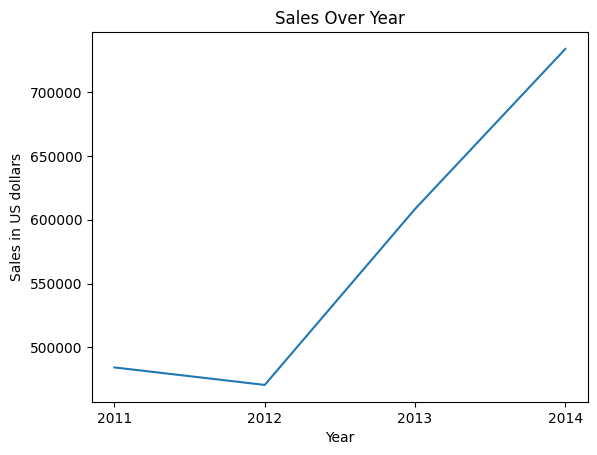

In [100]:
grouped_data = ss.groupby(['Order Year'])['Sales'].sum()
plt.plot(grouped_data.index, grouped_data.values)
plt.xticks(grouped_data.index)
plt.xlabel('Year')
plt.ylabel('Sales in US dollars')
plt.title('Sales Over Year')
plt.show()

In year 2012 has lowest sales among all year but they were going better in 2013 and 2014.

## Profit over year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


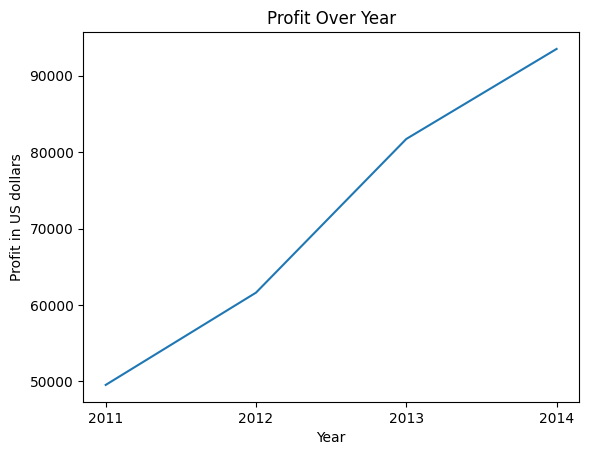

In [102]:
grouped_data = ss.groupby(['Order Year'])['Profit'].sum()
plt.plot(grouped_data.index, grouped_data.values)
plt.xticks(grouped_data.index)
plt.xlabel('Year')
plt.ylabel('Profit in US dollars')
plt.title('Profit Over Year')
plt.show()

However, our business had more net profit in every year. Lets look by category

## Sale and Profit over year by Category

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


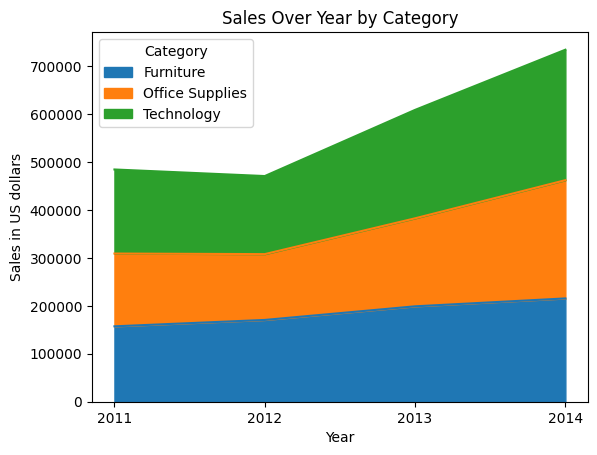

In [106]:
grouped_data = ss.groupby(['Order Year','Category'])['Sales'].sum().unstack()
grouped_data.plot.area()
plt.xticks(grouped_data.index)
plt.xlabel('Year')
plt.ylabel('Sales in US dollars')
plt.title('Sales Over Year by Category')
# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


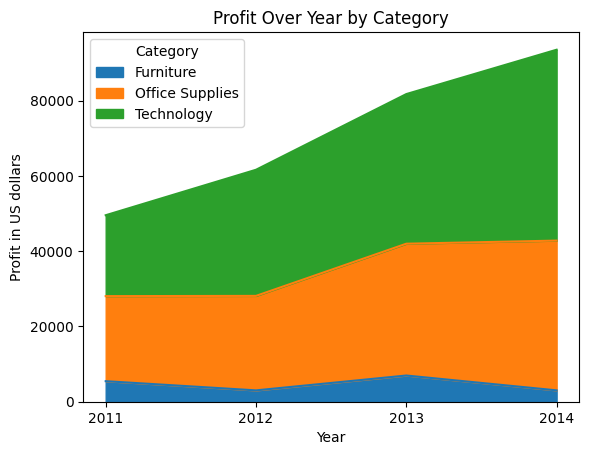

In [107]:
grouped_data = ss.groupby(['Order Year','Category'])['Profit'].sum().unstack()
grouped_data.plot.area()
plt.xticks(grouped_data.index)
plt.xlabel('Year')
plt.ylabel('Profit in US dollars')
plt.title('Profit Over Year by Category')
# Show the plot
plt.show()

From this graph, we suggest to downsize the furniture category because it has the lowest profit and sales over all other category.

## Sales by category

In [61]:
ss.groupby('Category')['Sales'].sum().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

Technology has the most sales among all categories.

In [62]:
ss[ss['Category'] == 'Technology'].groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sub-Category
Phones         330007.054
Machines       189238.631
Accessories    167380.318
Copiers        149528.030
Name: Sales, dtype: float64

Phones has the most sales in technology category.

In [63]:
ss[ss['Sub-Category'] == 'Phones'].groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product Name
Samsung Galaxy Mega 6.3                                                13943.668
Apple iPhone 5                                                         12996.600
Wilson Electronics DB Pro Signal Booster                                8878.400
Mitel MiVoice 5330e IP Phone                                            7699.720
Samsung Galaxy S III - 16GB - pebble blue (T-Mobile)                    7139.796
                                                                         ...    
Shocksock Galaxy S4 Armband                                               63.510
Anker 24W Portable Micro USB Car Charger                                  61.544
SKILCRAFT Telephone Shoulder Rest, 2" x 6.5" x 2.5", Black                56.164
Sannysis Cute Owl Design Soft Skin Case Cover for Samsung Galaxy S4       13.860
PNY Rapid USB Car Charger - Black                                          9.588
Name: Sales, Length: 189, dtype: float64

Samsung Galaxy Mega 6.3 and Apple iphone 5 have the most sales in phone sub-category.

## Profit by category

In [64]:
ss.groupby('Category')['Profit'].sum().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

In [65]:
ss[ss['Category'] == 'Technology']['Profit'].std()/ss[ss['Category'] == 'Office Supplies']['Profit'].std()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.6006653372152955

In [66]:
import scipy.stats as stats
data1 = ss[ss['Category'] == 'Technology']['Profit']
data2 = ss[ss['Category'] == 'Office Supplies']['Profit']
t_statistic, p_value = stats.ttest_ind(data1, data2)

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Check if the p-value is significant (using a common significance level of 0.05)
if p_value < 0.05:
    print("The means are significantly different.")
else:
    print("The means are not significantly different.")

t-statistic: 8.687539082544111
p-value: 4.4542772738946324e-18
The means are significantly different.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
print('tech avg : {}'.format(data1.mean()))
print('office supplies avg : {}'.format(data2.mean()))

tech avg : 78.75200221981592
office supplies avg : 20.3270495851311


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Technology make the most profit among all categories.

In [68]:
ss[ss['Category'] == 'Technology'].groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sub-Category
Phones         330007.054
Machines       189238.631
Accessories    167380.318
Copiers        149528.030
Name: Sales, dtype: float64

In [69]:
ss[ss['Sub-Category'] == 'Phones'].groupby('Product Name')['Profit'].sum().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product Name
Samsung Galaxy Mega 6.3                                                                                 1822.7566
Apple iPhone 5                                                                                          1611.5784
Panasonic KX-TG9471B                                                                                    1168.1004
Panasonic KX-TG9541B DECT 6.0 Digital 2-Line Expandable Cordless Phone With Digital Answering System    1147.4235
Samsung Galaxy S4 Mini                                                                                  1104.4765
                                                                                                          ...    
Cisco IP Phone 7961G-GE VoIP phone                                                                      -119.1190
Samsung Galaxy Note 2                                                                                   -128.7972
LG Exalt                                                                   

If we have a pricing strategy, we should focus on upselling in the phone-technology category, particularly for the Samsung Galaxy Mega 6.3 and the Apple iPhone 5

In [70]:
ss.groupby('Product Name')['Order ID'].count().sort_values(ascending=False)/ss['Order ID'].nunique()*100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product Name
Staples                                                                      4.531843
Avery Non-Stick Binders                                                      0.399281
KI Adjustable-Height Table                                                   0.359353
Storex Dura Pro Binders                                                      0.339389
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling                    0.299461
                                                                               ...   
Konica Minolta magicolor 1690MF Multifunction Printer                        0.019964
Xerox 1984                                                                   0.019964
Cisco Desktop Collaboration Experience DX650 IP Video Phone                  0.019964
Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection    0.019964
Cisco SPA525G2 5-Line IP Phone                                               0.019964
Name: Order ID, Length: 1841, dtype: floa

The most commonly purchased product in every basket is staples, accounting for 4.53% of all baskets. It seems less in value. Lets, deep down into month.

In [71]:
a = ss.groupby(['Order Month','Product Name'])['Order ID'].count()/ss.groupby('Order Month')['Order ID'].nunique()*100
a = pd.DataFrame(a)
a.columns = ['Percent']
for i in range(1,13):
    print('Month {}'.format(i))
    print(a.loc[i].sort_values(by=['Percent'],ascending=False).head())
    print('*******************************')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Month 1
                                                     Percent
Product Name                                                
Staples                                             4.316547
Wilson Jones data.warehouse D-Ring Binders with...  1.079137
Eldon ClusterMat Chair Mat with Cordless Antist...  1.079137
DAX Black Cherry Wood-Tone Poster Frame             1.079137
Global Highback Leather Tilter in Burgundy          1.079137
*******************************
Month 2
                                                     Percent
Product Name                                                
Staples                                             8.661417
Xerox 1881                                          1.181102
Adjustable Depth Letter/Legal Cart                  1.181102
Honeywell Enviracaire Portable HEPA Air Cleaner...  1.181102
GBC Plastic Binding Combs                           1.181102
*******************************
Month 3
                                                     Perce

Seem less amount.

Lets do some .Create matrix 0,1 on order id vs product name as input of association rule.

## Basket Analysis

In [72]:
basket = (ss.groupby(['Order ID', 'Product Name'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order ID'))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product Name,"""While you Were Out"" Message Book, One Form per Page","#10 Gummed Flap White Envelopes, 100/Box",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",#6 3/4 Gummed Flap White Envelopes,"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",...,Zebra ZM400 Thermal Label Printer,Zebra Zazzle Fluorescent Highlighters,Zipper Ring Binder Pockets,i.Sound Portable Power - 8000 mAh,iHome FM Clock Radio with Lightning Dock,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",iOttie HLCRIO102 Car Mount,iOttie XL Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,netTALK DUO VoIP Telephone Service
Order ID,,,,,,,,,,,,,,,,,,,,,
CA-2011-100006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA-2011-100090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA-2011-100293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA-2011-100328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA-2011-100363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US-2014-168802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
US-2014-169320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
US-2014-169488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# from mlxtend.frequent_patterns import apriori, association_rules

# # Generate frequent itemsets using Apriori algorithm
# frequent_itemsets = apriori(encoded_df.drop('Order ID', axis=1), min_support=0.05, use_colnames=True)

# # Generate association rules
# association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# # Display association rules
# print("Frequent Itemsets:")
# print(frequent_itemsets)
# print("\nAssociation Rules:")
# print(association_rules_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


There is no association rule beacause all product didn't pass minimum support and minimum threshold.

## Discount Analysis

 **Coupon Redemption Rate**: Measure how often customers use coupons or discounts

In [74]:
ss['Discount'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

In [75]:
id_dis_sum = ss.groupby(['Order ID'])['Discount'].sum()
(id_dis_sum != 0).sum()*100/id_dis_sum.count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


58.97384707526452

58.97 percent of all transactions use discount. Conclude that customer tend to more use discount when they go shopping.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


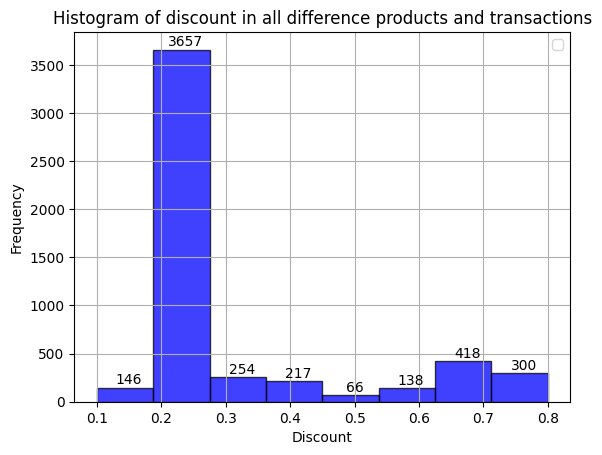

In [76]:
hist_values, bin_edges, _ = plt.hist(ss[ss['Discount'] > 0]['Discount'],bins=8, alpha=0.75, color='blue', edgecolor='black')

# Print the bin edges on the histogram
for value, frequency, bin_edge in zip(hist_values, bin_edges[1:], bin_edges[:-1]):
    plt.text(bin_edge +0.05 , value + 5, str(int(value)), ha='center', va='bottom')

# Display the histogram
plt.xlabel("Discount")
plt.ylabel("Frequency")
plt.title("Histogram of discount in all difference products and transactions")
plt.legend()
plt.grid(True)
plt.show()

Our customer use [20,30) % discount the most among all discount. We suggest to create this discount rate to attract customer.

# Supply Chain aspect

find out time to ship order. We assume that order date is the day that order was made and ship date is the day when order was delivered.

In [77]:
ss['delivery time'] = ss['Ship Date'] - ss['Order Date']
ss['delivery time'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count                          9994
mean      8 days 00:41:12.523514108
std      96 days 04:26:57.728617038
min             -320 days +00:00:00
25%                 2 days 00:00:00
50%                 4 days 00:00:00
75%                61 days 00:00:00
max               214 days 00:00:00
Name: delivery time, dtype: object

It seems that min delivery time has negative value. So, we assume that it was mistakes in recording value. We solve this by absoluting their values.

In [78]:
from datetime import timedelta
ss[ss['delivery time'] == timedelta(days=-320)].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,delivery time
716,717,CA-2011-130092,2011-12-01,2011-01-15,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814,12,2011,-320 days
961,962,CA-2012-160059,2012-11-27,2012-01-12,Standard Class,TB-21190,Thomas Brumley,Home Office,United States,Fayetteville,...,Office Supplies,Binders,Zipper Ring Binder Pockets,6.240,2,0.0,3.0576,11,2012,-320 days
2211,2212,CA-2013-162313,2013-11-28,2013-01-12,First Class,VB-21745,Victoria Brennan,Corporate,United States,Lincoln Park,...,Office Supplies,Appliances,Euro-Pro Shark Turbo Vacuum,167.292,6,0.1,29.7408,11,2013,-320 days
3475,3476,CA-2013-144911,2013-11-28,2013-01-12,First Class,RW-19630,Rob Williams,Corporate,United States,Overland Park,...,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,34.950,5,0.0,15.3780,11,2013,-320 days
3476,3477,CA-2013-144911,2013-11-28,2013-01-12,First Class,RW-19630,Rob Williams,Corporate,United States,Overland Park,...,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,152.000,5,0.0,69.9200,11,2013,-320 days


In [79]:
ss['delivery time'] = ss['delivery time'].abs() / np.timedelta64(1, 'D')
ss['delivery time'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    9994.000000
mean       60.166900
std        75.469705
min         0.000000
25%         4.000000
50%         7.000000
75%       120.000000
max       320.000000
Name: delivery time, dtype: float64

## Delivery time by segment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


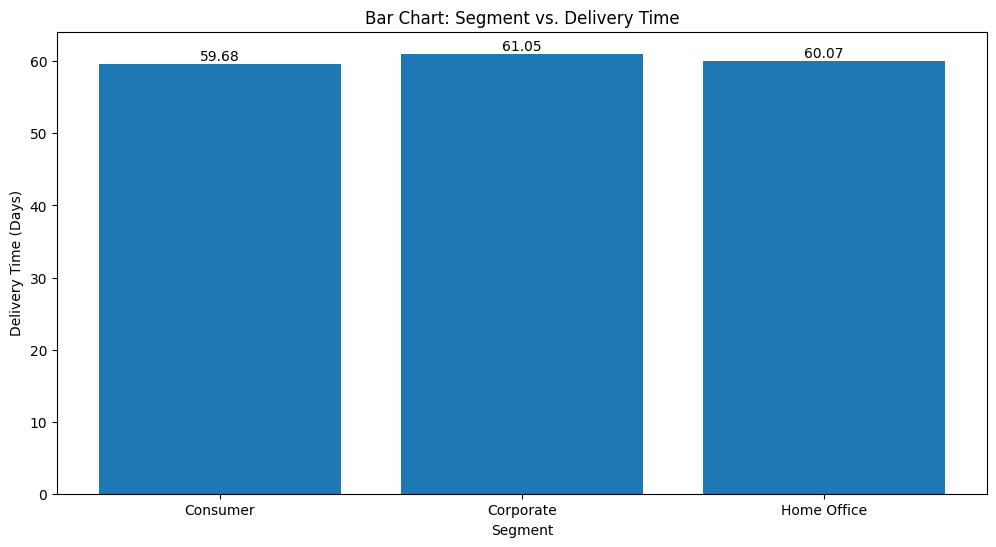

In [80]:
Segment_Del = ss.groupby("Segment")["delivery time"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
plt.bar(Segment_Del['Segment'],Segment_Del['delivery time'])
plt.xlabel('Segment')
plt.ylabel('Delivery Time (Days)')
plt.title('Bar Chart: Segment vs. Delivery Time')
for index, value in enumerate(Segment_Del['delivery time']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.show()

Every customer segementation have long delivery time (around 60 days). we suggest to outsource delivery company or optimize route to decrease delivery time.

## Delivery time by Ship Mode

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


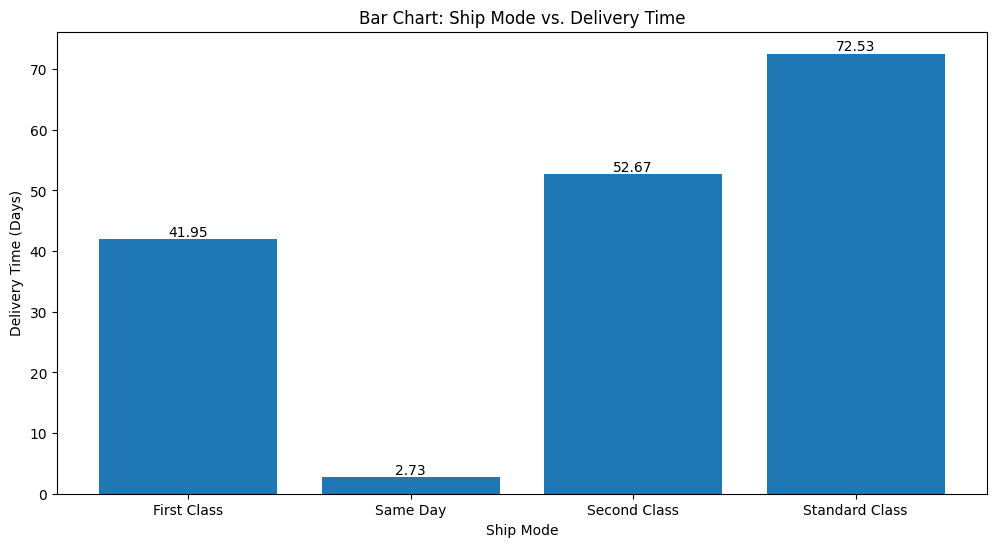

In [81]:
Segment_Del = ss.groupby("Ship Mode")["delivery time"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
plt.bar(Segment_Del['Ship Mode'], Segment_Del['delivery time'])
plt.xlabel('Ship Mode')
plt.ylabel('Delivery Time (Days)')
plt.title('Bar Chart: Ship Mode vs. Delivery Time')
for index, value in enumerate(Segment_Del['delivery time']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.show()

Same day type has more than 1 day delivery time. There must be a problem in shipping supply chain. Other types of shipping have too much delivery time when compare to UPS company which is less than 10 business days.

## Delivery time by Region

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


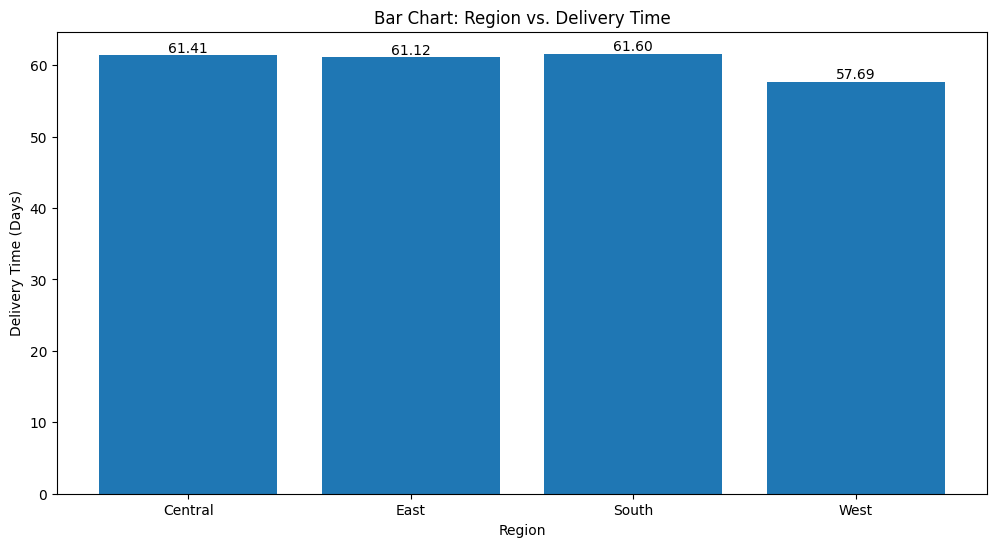

In [82]:
Segment_Del = ss.groupby("Region")["delivery time"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
plt.bar(Segment_Del['Region'], Segment_Del['delivery time'])
plt.xlabel('Region')
plt.ylabel('Delivery Time (Days)')
plt.title('Bar Chart: Region vs. Delivery Time')
for index, value in enumerate(Segment_Del['delivery time']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.show()

## Delivery time by City

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


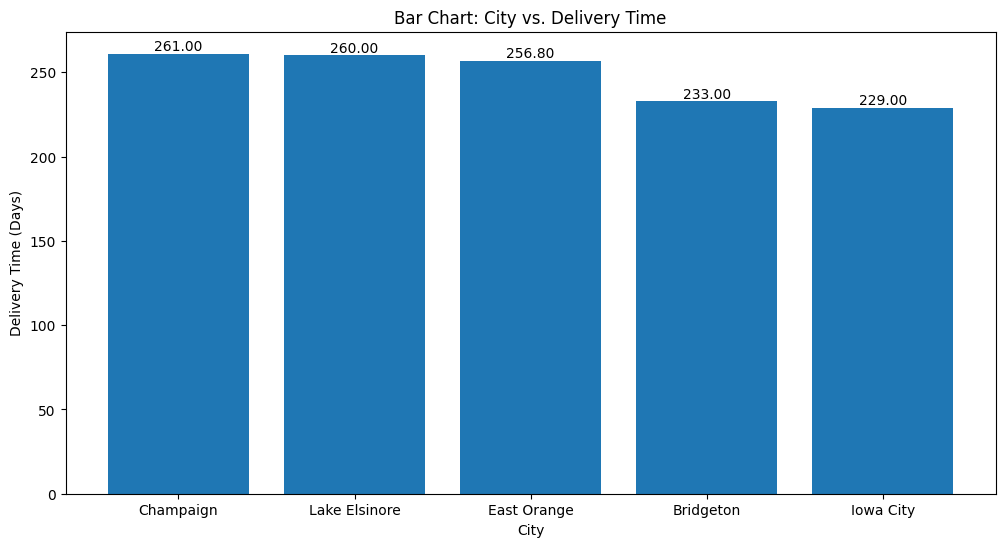

In [83]:
Segment_Del = ss.groupby("City")["delivery time"].mean().to_frame().reset_index().sort_values(by=["delivery time"],ascending=False).head()
plt.figure(figsize=(12,6))
plt.bar(Segment_Del['City'], Segment_Del['delivery time'])
plt.xlabel('City')
plt.ylabel('Delivery Time (Days)')
plt.title('Bar Chart: City vs. Delivery Time')
for index, value in enumerate(Segment_Del['delivery time']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.show()

There is the big problem in deliver item in these 5 citys. We recommend

**Optimize Supply Chain**: Review and optimize your supply chain processes. Look for ways to reduce lead times in sourcing materials, manufacturing, and distribution. Streamline operations to eliminate bottlenecks.


**Route Optimization**: Use route optimization software for deliveries to minimize travel time and fuel costs. Ensure efficient routing for your delivery vehicles.

**Warehouse Efficiency**: Optimize your warehouse layout and operations for faster order picking and packing. Implement automation and technology where applicable to reduce manual handling.

**Supplier Relationships**: Build strong relationships with suppliers and negotiate for shorter lead times. Consider multiple suppliers to reduce dependence on a single source.

**Forecasting**: Improve demand forecasting accuracy to plan production and delivery schedules more effectively. This will help you avoid overproduction or underproduction.

**Technology**: Invest in modern inventory management systems, order tracking systems, and other technologies that can provide real-time insights and streamline processes.

**Emergency Response Plan**: Have a plan in place for dealing with unexpected disruptions, such as natural disasters or strikes, which can impact delivery times.

**Outsourcing**: Consider outsourcing certain aspects of your delivery process to specialized logistics companies if it can lead to faster and more reliable delivery.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


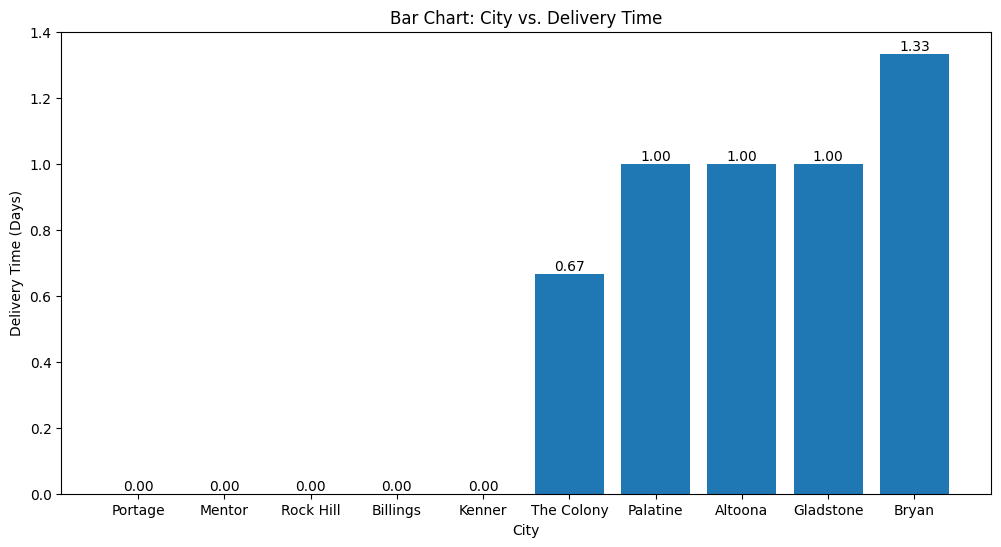

In [84]:
Segment_Del = ss.groupby("City")["delivery time"].mean().to_frame().reset_index().sort_values(by=["delivery time"],ascending=True).head(10)
plt.figure(figsize=(12,6))
plt.bar(Segment_Del['City'], Segment_Del['delivery time'])
plt.xlabel('City')
plt.ylabel('Delivery Time (Days)')
plt.title('Bar Chart: City vs. Delivery Time')
for index, value in enumerate(Segment_Del['delivery time']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.show()

In [85]:
ss.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Year', 'delivery time'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


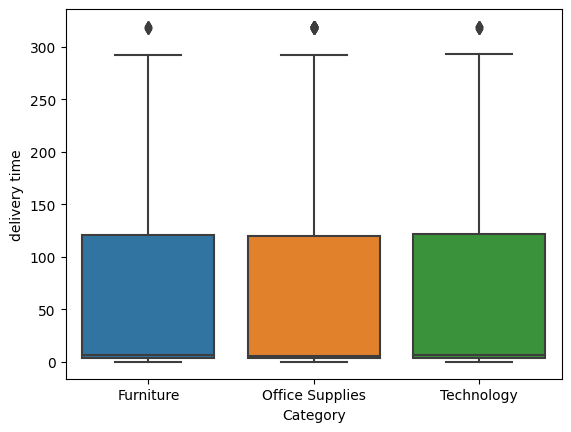

In [86]:
import seaborn as sns

sns.boxplot(data=ss ,x='Category' ,y='delivery time')
plt.show()

Seem 3 categories have same distribution. There are some of outliers. Let'see ....

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


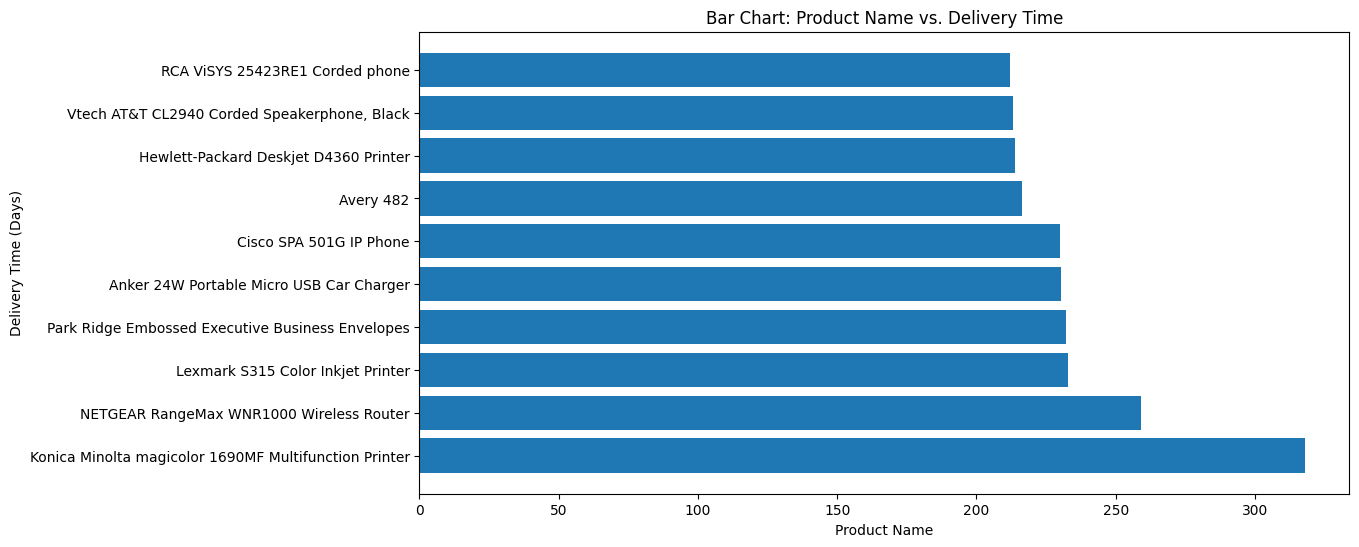

In [87]:
Segment_Del = ss.groupby("Product Name")["delivery time"].mean().to_frame().reset_index().sort_values(by=["delivery time"],ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.barh(Segment_Del['Product Name'], Segment_Del['delivery time'])
plt.xlabel('Product Name')
plt.ylabel('Delivery Time (Days)')
plt.title('Bar Chart: Product Name vs. Delivery Time')
plt.show()

Sales and Demand Metrics:

**Total Sales**: Monitor the overall revenue generated by the superstore.
Sales by Product Category: Analyze sales performance across different product categories (e.g., electronics, clothing, furniture).
Sales by Location: Compare sales data across different store locations.
Sales Trends: Identify seasonal patterns and trends in sales to optimize inventory and staffing.
Inventory Metrics:

**Inventory Turnover**: Calculate how quickly products are sold and replaced on the shelves.
Stockout Rate: Measure the percentage of times a product is out of stock when a customer wants to purchase it.
Days of Inventory on Hand (DOI): Determine the average number of days inventory is held before being sold.
Slow-Moving and Obsolete Inventory: Identify products that are not selling well or are outdated, as they tie up capital and storage space.
Supplier Metrics:

**Supplier Performance**: Evaluate the reliability, quality, and timeliness of product deliveries from different suppliers.
Supplier Lead Time: Analyze the time it takes for products to be delivered after an order is placed.
Customer Metrics:

**Customer Satisfaction**: Use feedback surveys or ratings to gauge customer satisfaction with the store's products and services.
Customer Loyalty: Measure repeat purchases and customer retention rates.
Average Transaction Value: Calculate the average amount spent by each customer per transaction.
Operational Metrics:

**Order Fulfillment Time**: Measure the time it takes to process an order from placement to delivery.
Return Rate: Evaluate the percentage of products that are returned by customers due to defects, dissatisfaction, or other reasons.
Store Shelf Replenishment: Analyze how quickly products are restocked on the store shelves to prevent stockouts.
Store Performance Metrics:

**Store Traffic**: Measure foot traffic in the store to understand peak hours and days.
**Conversion Rate**: Calculate the percentage of store visitors who make a purchase.
Average Checkout Time: Assess the time customers spend waiting in line to check out.
Promotion and Marketing Metrics:

**Effectiveness of Promotions**: Analyze the impact of marketing campaigns and promotions on sales.
Coupon Redemption Rate: Measure how often customers use coupons or discounts.
Profitability Metrics:

**Gross Margin**: Calculate the difference between revenue and the cost of goods sold, expressed as a percentage.
**Net Profit**: Assess the overall profitability of the store after deducting all expenses

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
